<a href="https://colab.research.google.com/github/letyrodridc/Inteligencia-Artificial-Curso-Inicial/blob/master/material%20docente/Dia%201/resueltos/AI_Aprendizaje_por_Refuerzos_Monte_Carlo_Blackjack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Artificial Intelligence lessons - by [Leticia Lorena Rodriguez](http://www.letyrodri.com/)

<center>Reinforcement Learning Introduction</center>
<center><h1>Monte Carlo Algorithm</h1></center>

The problems that can be solved by Reinforcement Learning are given as a Markov Decision Process (MDP).


![MDP](img/mdp.png)



## Creating an AI that plays Blackjack

The famous card game "Blackjack"[1] can be described as an MDP problem to build artificial intelligence that plays Blackjack, winning the most of the matches.

![BlackJack Board](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4b/Blackjack_board.JPG/800px-Blackjack_board.JPG)

[1] [Wikipedia: BlackJack](https://en.wikipedia.org/wiki/Blackjack)


## Activity 1: Understanding the OpenAI environment for the Blackjack problem

OpenAI[2] is a foundation that has the mission to assure the benefit of AI for Humanity. Its webpage describes it:

"OpenAI’s mission is to ensure that artificial general intelligence (AGI)—by which we mean highly autonomous systems that outperform humans at most economically valuable work—benefits all of humanity. We will attempt to directly build safe and beneficial AGI, but will also consider our mission fulfilled if our work aids others to achieve this outcome."

It offers a library with different environments to be used for testing and developing AI algorithms. It has an specific environment that simulates Blackjack matches. I will explain it here, in this lab.


#### ¿Which are the rules of OpenAI's Blackjack?

<br>

**Objective**

Blackjack is an English card game where the goal is with all the hand cards to sum 21 or closer without exceeding it.


<br>

**Players**

The AI (player) is going to play against the dealer.

<br>

**The deck**

The game is implemented over an infinite deck (or with replacement).
 
      🂡	🂢	🂣	🂤	🂥	🂦	🂧	🂨	🂩	🂪	🂫	🂭	🂮	
  
      🂱	🂲	🂳	🂴	🂵	🂶	🂷	🂸	🂹	🂺	🂻	🂽	🂾	
      
      🃁	🃂	🃃	🃄	🃅	🃆	🃇	🃈	🃉	🃊	🃋	🃍	🃎	
  
      🃑	🃒	🃓	🃔	🃕	🃖	🃗	🃘	🃙	🃚	🃛	🃝	🃞
      
      🂠
      


<br>

**Card values**

The Jack, Queen, and King cards have a value of 10.  🃛	🃝	🃞  🂻	🂽	🂾  🃋	🃍	🃎	🃛	🃝	🃞

The Aces can be 11 or 1. When its value is 11, it's called "usable".   🂡 🂱 🃁 🃑

The value of the rest of the card is the printed one. So, for example, the card 🃃 has a value of 3.

<br>

**Game dynamic**

The game starts with two pairs of a face-up card and a face-down card—a pair for the player and the dealer. 🃒 🂠  The player goes first and turns the face-down card up. The player then can ask for an additional card  (hit=1) until he/she decides to stop (stick=0). If the sum exceeds 21, bust. After the player stick, the dealer reveals their face-down card and grab a new card until the sum is 17 or more. Suppose the dealer bust, the player wins. If the player and the dealer don't bust, the result (win-lose-draw) will depend on the one that got closer to 21.  

<br>

**Reward**

The player's reward in case of winning is +1, 0 if there is a tie, and -1 if they lose.

<br>

**State Space**

The state (observation) is a triplet of: the card sum of the player, if the dealer is showing an Ace, and if the player has an usuable Ace (0 or 1).

<br>
This environment corresponds to the version described in the 5.1 example of the book: "Reinforcement Learning: An introduction" by Sutton and Barto.

<br>
Public draft here: http://incompleteideas.net/book/the-book-2nd.html

#### Imports the necessary packages

In [3]:
!pip install gym
import gym       # OpenAI library
import random
from collections import deque
import numpy as np

# Automatical refresh of the notebook (needed for jupyter notebooks)
%load_ext autoreload
%autoreload 2

     |████████████████████████████████| 1.6 MB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 4.7 MB/s eta 0:00:01
  Created wheel for gym: filename=gym-0.18.0-py3-none-any.whl size=1656447 sha256=60f4a171d1b0681e23cba9da4b0007255ce299d6d6bded1a3bb17e14bdbb4a5a
  Stored in directory: /home/lety/.cache/pip/wheels/d8/e7/68/a3f0f1b5831c9321d7523f6fd4e0d3f83f2705a1cbd5daaa79
Successfully built gym
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.0.1
    Uninstalling Pillow-8.0.1:
      Successfully uninstalled Pillow-8.0.1


#### We start the Blackjack environment

In [4]:
env = gym.make('Blackjack-v0')
env.seed(0) # The environment needs a random seed


[0]

#### We observe the environment elements, in particular, the actions and the states.

In [5]:
action_space = env.action_space              # We get the quantity of elements of the action space
observation_space = env.observation_space    # We get the quantity of elements of the state space

## We get the quantiy of actions in an integer
actions_len = action_space.n

print("Actions: ", action_space)
print("States: ", observation_space)

Actions:  Discrete(2)
States:  Tuple(Discrete(32), Discrete(11), Discrete(2))


Once we had started the environment, we can simulate a Blackjack game.

A game is going to be an episode. That's means a sequence of these interations until the game ends.


In [7]:
action_name = ["STICK","HIT"]
play_games = 10 # Change the games quantity

rewards = list()

for g in range(0, play_games):
    print("Game ... ",g+1)
    
    #  Starts again. It resets the environment
    initial_state = env.reset()
    
    print("Initial state:", initial_state)
   
    while(True):
        # Shows the environment. It draws it. In BlackJack, there isn't visual environment -> commented
        #env.render()
        print("Player: ",env.player)
        print("Dealer: ",env.dealer)
        # Choose an action
        action = action_space.sample()
        
        print(action_name[action])

        # Takes an action
        next_state, reward, done, _ = env.step(action)
        
        print("Current state:", next_state)
        
        
        if done:
            rewards.append(reward)
            print("Player: ",env.player)
            print("Dealer: ",env.dealer)
            print("Reward:", reward)
            
            break

  

print("\nWin: ",np.sum([t for t in rewards if t > 0])/play_games*100,"%\n")
print("\nTie: ",np.sum([t for t in rewards if t == 0])/play_games*100,"%\n")
print("\nLost: ",np.sum([t*-1 for t in rewards if t < 0])/play_games*100,"%\n")
    
    

Game ...  1
Initial state: (12, 8, False)
Player:  [10, 2]
Dealer:  [8, 6]
STICK
Current state: (12, 8, False)
Player:  [10, 2]
Dealer:  [8, 6, 4]
Reward: -1.0
Game ...  2
Initial state: (19, 3, False)
Player:  [9, 10]
Dealer:  [3, 2]
HIT
Current state: (23, 3, False)
Player:  [9, 10, 4]
Dealer:  [3, 2]
Reward: -1.0
Game ...  3
Initial state: (7, 2, False)
Player:  [3, 4]
Dealer:  [2, 4]
HIT
Current state: (17, 2, False)
Player:  [3, 4, 10]
Dealer:  [2, 4]
HIT
Current state: (27, 2, False)
Player:  [3, 4, 10, 10]
Dealer:  [2, 4]
Reward: -1.0
Game ...  4
Initial state: (15, 4, False)
Player:  [9, 6]
Dealer:  [4, 5]
HIT
Current state: (25, 4, False)
Player:  [9, 6, 10]
Dealer:  [4, 5]
Reward: -1.0
Game ...  5
Initial state: (14, 9, False)
Player:  [8, 6]
Dealer:  [9, 2]
HIT
Current state: (18, 9, False)
Player:  [8, 6, 4]
Dealer:  [9, 2]
HIT
Current state: (28, 9, False)
Player:  [8, 6, 4, 10]
Dealer:  [9, 2]
Reward: -1.0
Game ...  6
Initial state: (15, 10, False)
Player:  [10, 5]
Dealer

En el código anterior, elegimos la accion de manera aleatoria (random_policy)

In [8]:
def random_policy():
  return action_space.sample()

## Activity 2: Creating an episode sequence

To finally comprehend the environment, we can write a function given an environment and choose a random action. It will return the list of states, actions, and rewards of an episode:


<center>
  
$s_0a_1r_1 s_1a_2r_2 s_2a_3r_3.... s_{n-1}a_nr_ns_n$


  
</center>

Where:
* Action: $a_i$ $\in$ $A$ y $0 \leq i < n$ 
* State: $s_i$ $\in$ $S$ y $0 \leq i < n$
* Reward: $r_i$ $\in$ $R$ y $0 \leq i < n$ 
* $n$ is the simulated episode length



In [29]:

def generate_episode(policy):
  episode_list = []
  
  initial_state = env.reset()
  
  state = initial_state
  
  while(True):
        # Choose an random action 
        action = action_space.sample()
        
        # Takes the action
        next_state, reward, done, _ = env.step(action)
        
        ## Add the action, the reward, and the next state to the list
        episode_list.append( (state, action, reward) )
       
        
        state = next_state
         
        if done:
            
            break
            
  return episode_list           

  
  

Testing *generate\_episode* method 

In [30]:
episode_list = generate_episode(random_policy)

print(episode_list)

[((17, 10, True), 0, 1.0)]


In the OpenAI's Blackjack environment, the **state** (observation) is a triplet: sum of the current player, if the dealer is showing an As or if the player has or hasn't an usable As (0 or 1)

**Action** with value 0 means that STICK and with value 1, HIT (continues).

**Return** with value -1 means LOSE, with value 0 a TIE, and with value 1 WINS.


## Activity 3: Implementing a Q-Table

To implement a Q-Table, we need an array with the size of the actions for each state.

In this example, we are going to use a dictionary where the keys are the states and the values a numpy array of size 2. Each index of the array will save the expected return for each action: idx 0 : STICK , idx 1: HIT.

#### Creating the data structure to hold the Q-Table 

In [13]:
from collections import defaultdict
from functools import partial

# We are going to use 2 as a parameter of the function np.zeros
# We are indicating that for each key created in the dictionary, we are going to use
# a two-values vector with value 0.
Q = None

def create_Q_Table():
  return defaultdict(partial(np.zeros, 2))
  
Q = create_Q_Table()

#### For example, let generate an episode and fill the table with the returns

In [14]:
def add_one_game_to_Q():
  episode_list = generate_episode(random_policy)

  i = 0

  while(i < len(episode_list)):
      state = episode_list[i][0]
      action = episode_list[i][1]
      reward = episode_list[i][2]

      Q[state][action] = Q[state][action]+reward
      i = i+1

add_one_game_to_Q()
print(Q,"\n")

defaultdict(..., {(14, 9, False): array([-1.,  0.])}) 



#### This is how the values are stored in the Q-Table

In [17]:
def print_Q(Q):
    
    states = list(Q.keys())
     
    print("The keys of the states: ", states)
    
    actions = [str(i) for i in range(len(Q[states[0]]))]
    
    print("---------- Q-Table ------------")
    print("\t\t","\t".join(actions))
    print("-------------------------------")
    
    for s in states:
        values = [Q[s][int(a)] for a in actions]
        print(f"{s}\t|{values[0]:.3f}\t|{values[1]:.3f}")
        
    print("Note: For clarity, values are truncated to three digits.")
                
print_Q(Q)



The keys of the states:  [(14, 9, False)]
---------- Q-Table ------------
		 0	1
-------------------------------
(14, 9, False)	|-1.000	|0.000
Note: For clarity, values are truncated to three digits.


### Lets see the Q-Table after 10 games.

Based on the table, ¿which decisions should we take for winning?

In [28]:
games = 10 
Q = create_Q_Table()
for i in range(games):
  add_one_game_to_Q()

print_Q(Q)  

The keys of the states:  [(13, 1, False), (16, 8, False), (13, 7, False), (18, 7, False), (10, 8, False), (20, 5, False), (12, 1, False), (7, 5, False), (11, 5, False), (14, 5, False), (11, 10, False), (18, 10, False), (8, 10, False), (12, 10, False), (21, 10, False)]
---------- Q-Table ------------
		 0	1
-------------------------------
(13, 1, False)	|-1.000	|0.000
(16, 8, False)	|0.000	|-1.000
(13, 7, False)	|-1.000	|0.000
(18, 7, False)	|0.000	|-1.000
(10, 8, False)	|-1.000	|0.000
(20, 5, False)	|0.000	|0.000
(12, 1, False)	|-1.000	|0.000
(7, 5, False)	|0.000	|0.000
(11, 5, False)	|0.000	|0.000
(14, 5, False)	|1.000	|0.000
(11, 10, False)	|0.000	|0.000
(18, 10, False)	|-1.000	|0.000
(8, 10, False)	|0.000	|0.000
(12, 10, False)	|0.000	|0.000
(21, 10, False)	|1.000	|0.000
Note: For clarity, values are truncated to three digits.


## Activity 4: Implementing an AI for wining Blackjack

Lets write an AI that using Reinforcement Learning is going to learn wich decision to take according to the hand. 



#### We are going to use an e-greedy policy in this exersice

In [19]:
def e_greedy(epsilon=0.5):
    
    # If the state is in the Q-Table -> it can use it
    if state in Q:
        
        # Searches the action with the higest value in the Q-Table
        target_action = np.argmax(Q[state])
        
        # It's going to assign a higher probability to the best action
        # All the other actions will get equiprobable probability epsilon/actions_len 
        p = [0.0 for i in range(actions_len)]

        # It creates p with the different probabilities for each action
        for action in range(actions_len):
            if action == target_action:
                p[action] = 1.0-epsilon+(epsilon/actions_len)
            else:
                p[action] = (epsilon/actions_len)

        # Choice function receives the probability of each action
        return np.random.choice(actions_len, p=p)
    else:
        # If the state is NOT in the Q-Table
        # It will chose randomly 1/actions_len
        return np.random.choice(actions_len)

#### Monte Carlo algorithm

![Monte Carlo](img/first_visit.png)

From Sutton & Barto, Reinforcement Learning: An Introduction book.

In [21]:
def monte_carlo_learning(env, episodes = 1000, debug=False):
    '''
    Generates the state-value function
    '''
    
    # Let start an empty table
    Q = defaultdict(partial(np.zeros, actions_len))
    
    # It creates two variables for saving the rewards sum
    # and the quantity (our goal is to calculate the average)
    returns = defaultdict(partial(np.zeros, actions_len))
    returns_totals = defaultdict(partial(np.zeros, actions_len))
    
    # It iterates over the episodes
    for e in range(episodes):
      
        # It generate a complete episode and returns the history
        # (state, action, reward, state, action, reward... so on)
        
        episode_history = generate_episode(e_greedy)
        
        # Completes the temporal variables with the cumulated returns and
        # the quantity of returns
        for (state, action, reward) in episode_history:
            returns[state][action] = returns[state][action]+reward
            returns_totals[state][action] = returns_totals[state][action]+1
        
        # Calculates the average and updates the Q-Table
        for (state, action, reward) in episode_history:
            Q[state][action] = returns[state][action] / returns_totals[state][action]

            if debug:
                print(f"Updates Q-Table: Q({state},{action}) = ",Q[state][action],"\n") 


            if done:
                break
    
    return Q


#### Lets execute the algorithm for learning and completing the Q-Table

In [22]:
episodes = 100 

Q = monte_carlo_learning(env,  episodes,  debug=True)



Updates Q-Table: Q((15, 2, False),0) =  1.0 

Updates Q-Table: Q((12, 10, False),1) =  0.0 

Updates Q-Table: Q((21, 10, True),1) =  0.0 

Updates Q-Table: Q((9, 8, False),0) =  -1.0 

Updates Q-Table: Q((12, 7, False),0) =  1.0 

Updates Q-Table: Q((16, 4, False),0) =  -1.0 

Updates Q-Table: Q((9, 3, False),0) =  1.0 

Updates Q-Table: Q((17, 1, False),1) =  -1.0 

Updates Q-Table: Q((18, 10, False),1) =  -1.0 

Updates Q-Table: Q((21, 10, True),1) =  0.0 

Updates Q-Table: Q((12, 5, False),1) =  0.0 

Updates Q-Table: Q((21, 1, True),1) =  0.0 

Updates Q-Table: Q((12, 10, False),1) =  0.0 

Updates Q-Table: Q((15, 9, True),0) =  -1.0 

Updates Q-Table: Q((20, 7, False),1) =  -1.0 

Updates Q-Table: Q((15, 7, False),1) =  0.0 

Updates Q-Table: Q((18, 1, False),1) =  -1.0 

Updates Q-Table: Q((16, 4, True),1) =  0.0 

Updates Q-Table: Q((19, 10, True),1) =  0.0 

Updates Q-Table: Q((12, 2, False),0) =  -1.0 

Updates Q-Table: Q((12, 10, False),0) =  -1.0 

Updates Q-Table: Q((16, 6,

#### Lets see the Q-Table learned

In [23]:
print_Q(Q) 

The keys of the states:  [(15, 2, False), (12, 10, False), (21, 10, True), (9, 8, False), (12, 7, False), (16, 4, False), (9, 3, False), (17, 1, False), (18, 10, False), (12, 5, False), (21, 1, True), (15, 9, True), (20, 7, False), (15, 7, False), (18, 1, False), (16, 4, True), (19, 10, True), (12, 2, False), (16, 6, True), (14, 10, False), (17, 4, False), (21, 6, True), (13, 10, False), (9, 5, False), (16, 8, False), (20, 4, False), (20, 6, False), (21, 8, True), (6, 8, False), (14, 1, False), (20, 10, False), (19, 6, True), (17, 2, False), (17, 10, False), (19, 4, False), (16, 10, False), (12, 8, False), (18, 4, False), (6, 10, False), (20, 3, False), (12, 9, False), (5, 6, False), (20, 10, True), (18, 3, False), (20, 5, False), (13, 9, True), (7, 3, False), (10, 8, False), (16, 3, True), (12, 2, True), (14, 5, False), (15, 10, False), (10, 3, False), (16, 9, False), (13, 6, False), (17, 5, False), (19, 2, True), (19, 6, False), (4, 1, False), (18, 5, True), (5, 7, False), (13, 10, T

#### We test it playing some games

In [27]:
# It starts over, reset the environment
state = env.reset()
    
print("Initial State:", state)

withUsableAs = "with As usable" if state[2] else "without As usable"
print(f"Player gets: {state[0]} {withUsableAs}, Dealer gets: {state[1]} ")
   

while(True):
    
  
    # Choose an action, the ones with the maximun reward in the Q-Table ~ 1 line
    action = np.argmax(Q[state])
        
    # Takes an action
    next_state, reward, done, _ = env.step(action)
    
    print(f"Chose an action: {action} - {action_name[action]}")
        
    state = next_state
    
    if action:
      withUsableAs = "with As usable" if state[2] else "without As usable"
      print(f"Player gets: {state[0]} {withUsableAs}")
    
    if done:
        result = "WIN" if reward > 0 else ("LOSE" if reward == 0 else "TIE")
        print("End of the game")
        print(f"The player {result}")
        break


Initial State: (8, 4, False)
Player gets: 8 without As usable, Dealer gets: 4 
Chose an action: 0 - STICK
End of the game
The player TIE


 #### Lets see how good is the algorithm

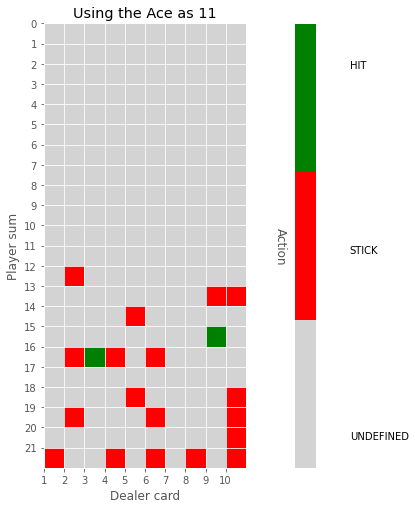

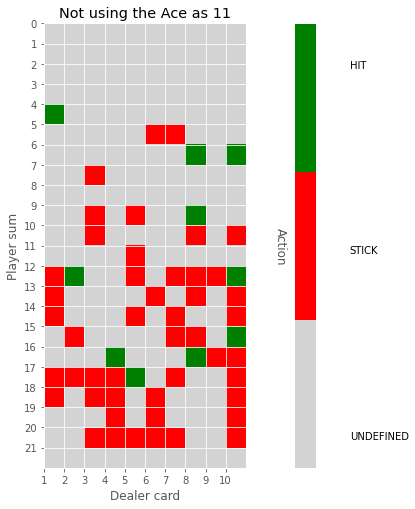

In [26]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def _get_policy_array(Q, usable_ace):
    
    data = np.zeros( (22,10) )
            
    for q in Q:

        target_action = np.argmax(Q[q])

        if q[0] in range(1,22) and q[2] == usable_ace:
            data[q[0]][q[1]-1] = target_action+1
        
    return data

def _plot_policy_array(policy_arr, title):
    cMap = ListedColormap(['lightgray',  'red', 'green'])
    fig, ax = plt.subplots(figsize=(7, 7))
    im = ax.imshow(policy_arr,  cmap=cMap)
    plt.style.use('ggplot')
    
    ax.set_xticks(np.arange(10)-0.5)
    ax.set_yticks(np.arange(22)-0.5)
    
    ax.set_xticklabels(np.arange(10)+1)
    ax.set_yticklabels(np.arange(22))
    ax.set_xlabel("Dealer card")
    ax.set_ylabel("Player sum")
    
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    fig.tight_layout()
    plt.title(title)
    
    cbar = plt.colorbar(im,pad=0.1)
    cbar.ax.get_yaxis().set_ticks([])
    for j, lab in enumerate(['UNDEFINED','STICK','HIT']):
        cbar.ax.text(5, (5 * j + 1) / 6.0, lab, ha='left', va='top')
    cbar.ax.get_yaxis().labelpad = -30
    cbar.ax.set_ylabel('Action', rotation=270)


    plt.show()
    
    

def Q_plot(Q, usable_ace):
    title = "Using the Ace as 11" if usable_ace else "Not using the Ace as 11"
    policy_arr = _get_policy_array(Q,usable_ace)
    _plot_policy_array(policy_arr, title)  
    
%matplotlib inline
        
Q_plot(Q,True)

Q_plot(Q,False)